# ChurnCase Challenge

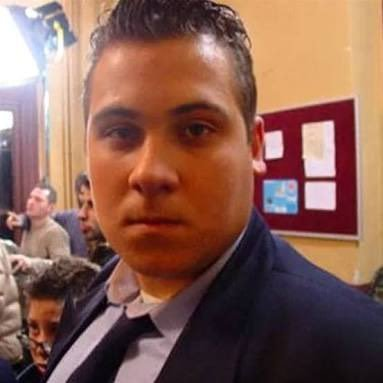
https://www.youtube.com/watch?v=5utbCYs7BVs

* Önce datadaki demografik verilerden personaları oluşturacağız.
* Sonrasında bizce en verimli 3 segmenti seçeceğiz(HARCAMA-HİZMET KULLANIMI-BAĞLILIK)
* 3  Segment için birer adet teklif üreteceğiz
* Notebook çok net anlaşılır olacak.

## Analysis Content
1. [About Dataset](#1)

1. [Python Libraries](#2)

1. [Missing Values](#3)

1. [Segmentation](#4)

1. [Segment1](#5)
 
1. [Segment2](#6)

1. [Segment3](#7)

1. [Pivot Tables](#8)

1. [Segment1 Offer](#9)

1. [Segment2 Offer](#10)

1. [Segment3 Offer](#11)


<a id ="1"></a>
### About Dataset


* The dataset includes essential information such as  customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract,PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into customer behavior and customer pattern.

* The raw data contains 7044 rows (customers) and 21 columns (features). Each row represents a customer, each column contains customer’s attributes described on the column. The “Churn” column is our target.

#### Attribute Information:

* **customerID:** Customer number. Nominal. A combination of 4-digit integer and  random letters uniquely assigned to each operation.

* **gender:** String variable of the customer's gender.

* **SeniorCitizen:** Integer. Explains whether the customer is a senior citizen or not (1, 0).

* **Partner:** String. Explains whether the customer has a partner or not (Yes, No).

* **Dependents:** String. Explains whether the customer has dependents or not (Yes, No).

* **tenure:** Integer.Numeric number of months the customer has stayed with the company.

* **PhoneService:** String. Explains whether the customer has a phone service or not (Yes, No).

* **MultipleLines:** String. Explains whether the customer has no phone service, multiple lines or not (Yes, No, No phone service).

* **InternetService:** String. Explains customer’s internet service provider (DSL, Fiber optic, No).

* **OnlineSecurity:** String. Explains whether the customer has no internet service, online security or not (Yes, No, No internet service).

* **OnlineBackup:** String. Explains whether the customer has no internet service, online backup or not (Yes, No, No internet service).

* **DeviceProtection:** String. Explains whether the customer has no internet service, device protection or not (Yes, No, No internet service).

* **TechSupport:** String. Explains whether the customer has no internet service, technical support or not (Yes, No, No internet service).

* **StreamingTV:** String. Explains whether the customer has no internet service, tv streaming or not (Yes, No, No internet service).

* **StreamingMovies:** String. Explains whether the customer has no internet service, movie stream or not (Yes, No, No internet service).

* **Contract:** String. Explains type of contract of the customers (one year, month-to-month, two year).

* **PaperlessBilling:** String. Explains whether the customers using paper bills or not(Yes, No).

* **PaymentMethod:** String. Explains customers payment method (Bank transfer(automatic), Electronic check, Mailed check, Credit card(automatic)).

* **MonthlyCharges:** Float. Monthly charges of the service customer is using currently.

* **TotalCharges:** Object. Total charges of the services customer has used.

* **Churn:** String. Customer is ended the contract or not(Yes, No).


<a id ="2"></a>
### Python Libraries

In [1]:
import pandas as pd # data proccessing, data manupilation
import seaborn as sns # data visualization 
import numpy as np # lineer algebra
import matplotlib as plt
pd.set_option("display.max_rows", None) #to see the complete data frame
pd.set_option("display.max_columns", None)#to see the complete data frame

In [2]:
df=pd.read_csv("TelcoCustomer.csv",delimiter = ";") # importing data

In [3]:
# Raw data copyed for future analysis
df_ham=df.copy()

In [4]:
df.head(30) # the first 30 rows of the data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
df.isnull().sum()# to recognize sum of missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.dtypes # to recognize the type of columns 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# The step of replacing the blank values in the columns in our data frame with NaN using the numpy library.
df = df.replace('^\s*$',np.nan, regex = True)

In [8]:
# After the filling the blanks with NaN, data is checked for the missing values.
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# The step of converting TotalCharges column to numeric value.
# df["TotalCharges"] = df['TotalCharges'].astype('float') --- alternative code.
df["TotalCharges"]=pd.to_numeric(df['TotalCharges'])


In [10]:
#Changing Yes and No variables to 1 and 0
col = ["Partner" ,"Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]
for i in col:
    df[i] = df[i].apply(lambda x :1 if x=="Yes" else 0)

<a id ="3"></a>
### Missing Values

<AxesSubplot:xlabel='TotalCharges'>

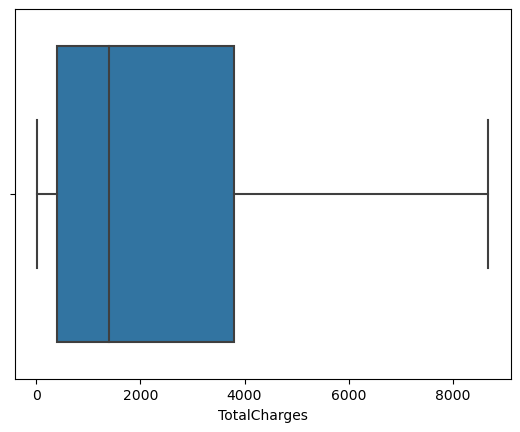

In [11]:
# Checking missing values from box plot
sns.boxplot(x=df["TotalCharges"])

In [12]:
#To recognize missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#Making new data frame to see the NaN values
nan_values = df[df.isna().any(axis=1)]
nan_values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


In [14]:
# Filling missing values by MonthlyCharges because these customers have 1 month tenure.
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])

In [306]:
#To control missing value by calling 2 columns
df[df["customerID"]=="1371-DWPAZ"]["TotalCharges"]

1340    56.05
Name: TotalCharges, dtype: float64

In [17]:
df[df["customerID"]=="1371-DWPAZ"]["MonthlyCharges"]

1340    56.05
Name: MonthlyCharges, dtype: float64

In [18]:
#Checking missing values again...
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
##Checking missing values one more time...Because we have some trust issues...:(
df[df.notna().any(axis=1)].shape

(7043, 21)

<a id ="4"></a>
### Segmentation

In [20]:
#Making shortcuts for definitions of Female and Male to F and M 
df["gender"] = df["gender"].replace(('Female','Male'),("F","M"))

In [21]:
#Making Shortcut definitions to form the segments names
col1 = ["Dependents", "SeniorCitizen", "Partner"]

for i in col1:
    for a in i:
        df[i] = df[i].replace((1,0),(a[0],0))

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,P,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,M,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,M,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,M,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,F,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# Checking unique values for each columns to recognize variable numbers 
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6534
Churn                  2
dtype: int64

In [24]:
#Forming segments names
df["Segment"]=[str(row[1] )+ str(row[2])+ str(row[3]) + str(row[4]) for row in df.values]

In [66]:
#Filtering Service amounts by lower than 2 greather than 2
df["ServiceAmount2"]="-2"
df.loc[df["ServiceAmount"]>2 , ["ServiceAmount2"]] = "+2"

In [25]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Segment
0,7590-VHVEG,F,0,P,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,F0P0
1,5575-GNVDE,M,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,M000
2,3668-QPYBK,M,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,M000
3,7795-CFOCW,M,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,M000
4,9237-HQITU,F,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,F000
5,9305-CDSKC,F,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,F000
6,1452-KIOVK,M,0,0,D,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,M00D
7,6713-OKOMC,F,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,F000
8,7892-POOKP,F,0,P,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,F0P0
9,6388-TABGU,M,0,0,D,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,M00D


In [51]:
# Counting Service amounts and copyed them to new column
df["ServiceAmount"]=[int(row[9] )+ int(row[10])+ int(row[11]) + int(row[12]) +int(row[13])+ int(row[14]) for row in df.values]


In [52]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Segment,ServiceAmount,ServiceAmount2
0,7590-VHVEG,F,0,P,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,F0P0,1,-2
1,5575-GNVDE,M,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,M000,2,-2
2,3668-QPYBK,M,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,M000,2,-2
3,7795-CFOCW,M,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,M000,3,+2
4,9237-HQITU,F,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,F000,0,-2
5,9305-CDSKC,F,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,F000,3,+2
6,1452-KIOVK,M,0,0,D,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,M00D,2,-2
7,6713-OKOMC,F,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,F000,1,-2
8,7892-POOKP,F,0,P,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,F0P0,4,+2
9,6388-TABGU,M,0,0,D,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,M00D,2,-2


In [53]:
#Verify Service amount values
df["ServiceAmount"].value_counts()

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: ServiceAmount, dtype: int64

In [54]:
#Analyzing churn and totalcharges  according to segments 
df_segment=df.groupby(["Segment"]).agg({"TotalCharges":["sum","count","mean"],"Churn":"mean"}).sort_values(('Churn', 'mean'),ascending = False)


In [55]:
df_segment

TotalCharges                        Churn
                 sum count         mean      mean
Segment                                          
FS00       672471.70   317  2121.361830  0.498423
MS00       481001.60   244  1971.318033  0.483607
MSP0       917792.15   281  3266.164235  0.373665
FSP0       787776.80   209  3769.266986  0.349282
FS0D         6510.55     3  2170.183333  0.333333
F000      2073697.30  1338  1549.848505  0.320628
M000      2055933.40  1381  1488.728023  0.302679
MSPD       188252.40    44  4278.463636  0.272727
M0P0      1919671.30   567  3385.663668  0.225750
F00D       176903.35   142  1245.798239  0.225352
FSPD       146323.50    39  3751.884615  0.205128
M00D       291812.70   211  1382.998578  0.203791
MS0D         9422.55     5  1884.510000  0.200000
F0P0      1883625.50   596  3160.445470  0.191275
F0PD      2205328.30   844  2612.948223  0.146919
M0PD      2240101.20   822  2725.183942  0.127737

In [58]:
#Calculating count percentage
df_segment["Count %"]=df_segment[(('TotalCharges', 'count'))]/df_segment[(('TotalCharges', 'count'))].sum()

In [59]:
df_segment

TotalCharges                        Churn   Count %
                 sum count         mean      mean          
Segment                                                    
FS00       672471.70   317  2121.361830  0.498423  0.045009
MS00       481001.60   244  1971.318033  0.483607  0.034644
MSP0       917792.15   281  3266.164235  0.373665  0.039898
FSP0       787776.80   209  3769.266986  0.349282  0.029675
FS0D         6510.55     3  2170.183333  0.333333  0.000426
F000      2073697.30  1338  1549.848505  0.320628  0.189976
M000      2055933.40  1381  1488.728023  0.302679  0.196081
MSPD       188252.40    44  4278.463636  0.272727  0.006247
M0P0      1919671.30   567  3385.663668  0.225750  0.080505
F00D       176903.35   142  1245.798239  0.225352  0.020162
FSPD       146323.50    39  3751.884615  0.205128  0.005537
M00D       291812.70   211  1382.998578  0.203791  0.029959
MS0D         9422.55     5  1884.510000  0.200000  0.000710
F0P0      1883625.50   596  3160.445470  0.191275  0.084623
F0PD      2205328.30   844  2612.948223  0.146919  0.119835
M0PD      2240101.20   822  2725.183942  0.127737  0.116712

In [60]:
df_segment.sort_values(('Count %',''),ascending= False)

TotalCharges                        Churn   Count %
                 sum count         mean      mean          
Segment                                                    
M000      2055933.40  1381  1488.728023  0.302679  0.196081
F000      2073697.30  1338  1549.848505  0.320628  0.189976
F0PD      2205328.30   844  2612.948223  0.146919  0.119835
M0PD      2240101.20   822  2725.183942  0.127737  0.116712
F0P0      1883625.50   596  3160.445470  0.191275  0.084623
M0P0      1919671.30   567  3385.663668  0.225750  0.080505
FS00       672471.70   317  2121.361830  0.498423  0.045009
MSP0       917792.15   281  3266.164235  0.373665  0.039898
MS00       481001.60   244  1971.318033  0.483607  0.034644
M00D       291812.70   211  1382.998578  0.203791  0.029959
FSP0       787776.80   209  3769.266986  0.349282  0.029675
F00D       176903.35   142  1245.798239  0.225352  0.020162
MSPD       188252.40    44  4278.463636  0.272727  0.006247
FSPD       146323.50    39  3751.884615  0.205128  0.005537
MS0D         9422.55     5  1884.510000  0.200000  0.000710
FS0D         6510.55     3  2170.183333  0.333333  0.000426

In [36]:
# FS00 MS00(high churn and total charges) / F000 M000(high churn rate for count) / MSP0 FSP0(high churn and total charges)

In [61]:
#To understand of the basic statistics of the data
df[["TotalCharges","MonthlyCharges","tenure"]].describe([0.25,0.75,0.99],include="all")

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2279.798992,64.761692,32.371149
std,2266.730170,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,398.550000,35.500000,9.000000
50%,1394.550000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
99%,8039.256000,114.729000,72.000000
max,8684.800000,118.750000,72.000000


In [62]:
#Making new data frames by filtering specified segments
segment1=df[(df["Segment"]=="M000")|(df["Segment"]=="F000")]
segment2=df[(df["Segment"]=="MS00")|(df["Segment"]=="FS00")]
segment3=df[(df["Segment"]=="MSP0")|(df["Segment"]=="FSP0")]

<a id ="5"></a>
### Segment1

In [63]:
segment1.groupby(["Segment"]).agg({"MonthlyCharges":["mean","count","sum"]})

MonthlyCharges                
                  mean count       sum
Segment                               
F000         61.297720  1338  82016.35
M000         58.981282  1381  81453.15

In [64]:
segment1.groupby(["Segment","InternetService"]).agg({"MonthlyCharges":["mean","count","sum"],"Churn":["mean"]})

MonthlyCharges                     Churn
                                  mean count       sum      mean
Segment InternetService                                         
F000    DSL                  55.309774   486  26880.55  0.230453
        Fiber optic          88.131745   556  49001.25  0.514388
        No                   20.724831   296   6134.55  0.104730
M000    DSL                  53.277433   483  25733.00  0.271222
        Fiber optic          88.517518   548  48507.60  0.447080
        No                   20.607286   350   7212.55  0.120000

In [65]:
segment1.groupby(["Segment","InternetService","ServiceAmount"]).agg({"MonthlyCharges":["mean","count","sum"],"Churn":["mean"]})

MonthlyCharges                     Churn
                                                mean count       sum      mean
Segment InternetService ServiceAmount                                         
F000    DSL             0                  40.869333    75   3065.20  0.413333
                        1                  46.831604   106   4964.15  0.311321
                        2                  53.172959    98   5210.95  0.214286
                        3                  58.480303    99   5789.55  0.181818
                        4                  66.944792    48   3213.35  0.083333
                        5                  75.843478    46   3488.80  0.086957
                        6                  82.039286    14   1148.55  0.071429
        Fiber optic     0                  72.345370   108   7813.30  0.611111
                        1                  79.540833   120   9544.90  0.600000
                        2                  87.729091   110   9650.20  0.609091
                        3                  94.961000   100   9496.10  0.450000
                        4                 102.119167    60   6127.15  0.383333
                        5                 107.539744    39   4194.05  0.282051
                        6                 114.502632    19   2175.55  0.105263
        No              0                  20.724831   296   6134.55  0.104730
M000    DSL             0                  40.691237    97   3947.05  0.443299
                        1                  47.484454   119   5650.65  0.386555
                        2                  51.822222    99   5130.40  0.232323
                        3                  58.044000    75   4353.30  0.173333
                        4                  66.314000    50   3315.70  0.100000
                        5                  75.900000    30   2277.00  0.033333
                        6                  81.453846    13   1058.90  0.000000
        Fiber optic     0                  71.847253    91   6538.10  0.549451
                        1                  79.920155   129  10309.70  0.558140
                        2                  88.139151   106   9342.75  0.433962
                        3                  95.205500   100   9520.55  0.400000
                        4                 102.050000    80   8164.00  0.300000
                        5                 108.025926    27   2916.70  0.370370
                        6                 114.386667    15   1715.80  0.200000
        No              0                  20.607286   350   7212.55  0.120000

In [242]:
segment1.groupby(["Segment","InternetService","Contract"]).agg({"MonthlyCharges":["mean","count","sum"],"Churn":["mean"]}).reset_index().sort_values(('Churn',  'mean'),ascending=False)

Segment InternetService        Contract MonthlyCharges                  \
                                                     mean count       sum   
3     F000     Fiber optic  Month-to-month      84.916253   443  37617.90   
12    M000     Fiber optic  Month-to-month      85.598152   433  37064.00   
9     M000             DSL  Month-to-month      49.572305   334  16557.15   
0     F000             DSL  Month-to-month      50.036745   298  14910.95   
13    M000     Fiber optic        One year      97.866456    79   7731.45   
15    M000              No  Month-to-month      20.339489   176   3579.75   
6     F000              No  Month-to-month      20.244667   150   3036.70   
4     F000     Fiber optic        One year      97.228788    66   6417.10   
14    M000     Fiber optic        Two year     103.115278    36   3712.15   
5     F000     Fiber optic        Two year     105.664894    47   4966.25   
10    M000             DSL        One year      58.240000    85   4950.40   
1     F000             DSL        One year      61.586842   114   7020.90   
16    M000              No        One year      20.594375    80   1647.55   
2     F000             DSL        Two year      66.874324    74   4948.70   
8     F000              No        Two year      21.635714    77   1665.95   
17    M000              No        Two year      21.119681    94   1985.25   
7     F000              No        One year      20.752174    69   1431.90   
11    M000             DSL        Two year      66.022656    64   4225.45   

       Churn  
        mean  
3   0.607223  
12  0.515012  
9   0.362275  
0   0.345638  
13  0.215190  
15  0.210227  
6   0.200000  
4   0.166667  
14  0.138889  
5   0.127660  
10  0.117647  
1   0.070175  
16  0.050000  
2   0.013514  
8   0.012987  
17  0.010638  
7   0.000000  
11  0.000000

<a id ="6"></a>
### Segment2

In [307]:
segment2.groupby(["Segment","InternetService","Contract","ServiceAmount2"]).agg({"MonthlyCharges":["mean","count","sum"],"Churn":["mean"]}).reset_index().sort_values(('Churn',  'mean'),ascending=False)

Segment InternetService        Contract ServiceAmount2 MonthlyCharges  \
                                                                    mean   
7     FS00     Fiber optic  Month-to-month             -2      80.972069   
22    MS00     Fiber optic  Month-to-month             -2      81.907965   
6     FS00     Fiber optic  Month-to-month             +2     100.049000   
21    MS00     Fiber optic  Month-to-month             +2     101.110526   
1     FS00             DSL  Month-to-month             -2      44.402273   
16    MS00             DSL  Month-to-month             -2      44.082258   
12    FS00              No  Month-to-month             -2      19.790000   
15    MS00             DSL  Month-to-month             +2      53.157692   
18    MS00             DSL        One year             -2      50.916667   
26    MS00              No  Month-to-month             -2      19.766667   
17    MS00             DSL        One year             +2      60.983333   
8     FS00     Fiber optic        One year             +2     102.837500   
2     FS00             DSL        One year             +2      74.225000   
4     FS00             DSL        Two year             +2      67.407143   
23    MS00     Fiber optic        One year             +2     103.375000   
0     FS00             DSL  Month-to-month             +2      60.383333   
20    MS00             DSL        Two year             -2      59.600000   
25    MS00     Fiber optic        Two year             +2     107.842857   
27    MS00              No        One year             -2      21.900000   
24    MS00     Fiber optic        One year             -2      79.600000   
14    FS00              No        Two year             -2      19.900000   
19    MS00             DSL        Two year             +2      73.770000   
13    FS00              No        One year             -2      20.350000   
11    FS00     Fiber optic        Two year             -2      79.200000   
10    FS00     Fiber optic        Two year             +2     105.904545   
9     FS00     Fiber optic        One year             -2      84.450000   
5     FS00             DSL        Two year             -2      59.850000   
3     FS00             DSL        One year             -2      34.200000   
28    MS00              No        Two year             -2      22.942857   

                       Churn  
   count       sum      mean  
7    145  11740.95  0.648276  
22   113   9255.60  0.619469  
6     50   5002.45  0.580000  
21    38   3842.20  0.578947  
1     44   1953.70  0.545455  
16    31   1366.55  0.516129  
12     5     98.95  0.400000  
15    13    691.05  0.384615  
18     3    152.75  0.333333  
26     3     59.30  0.333333  
17     9    548.85  0.222222  
8     28   2879.45  0.214286  
2      6    445.35  0.166667  
4      7    471.85  0.142857  
23     8    827.00  0.125000  
0     12    724.60  0.083333  
20     1     59.60  0.000000  
25     7    754.90  0.000000  
27     5    109.50  0.000000  
24     1     79.60  0.000000  
14     2     39.80  0.000000  
19     5    368.85  0.000000  
13     3     61.05  0.000000  
11     1     79.20  0.000000  
10    11   1164.95  0.000000  
9      1     84.45  0.000000  
5      1     59.85  0.000000  
3      1     34.20  0.000000  
28     7    160.60  0.000000

<a id ="7"></a>
### Segment3

In [70]:
segment3.groupby(["Segment","InternetService","Contract","ServiceAmount2"]).agg({"MonthlyCharges":["mean","count","sum"],"Churn":["mean"]}).reset_index().sort_values(('Churn',  'mean'),ascending=False)

Segment InternetService        Contract ServiceAmount2 MonthlyCharges  \
                                                                    mean   
6     FSP0     Fiber optic  Month-to-month             -2      81.638182   
1     FSP0             DSL  Month-to-month             -2      43.815000   
21    MSP0     Fiber optic  Month-to-month             -2      81.901149   
20    MSP0     Fiber optic  Month-to-month             +2      99.412308   
25    MSP0              No  Month-to-month             -2      20.600000   
11    FSP0              No  Month-to-month             -2      23.275000   
15    MSP0             DSL  Month-to-month             -2      38.365000   
5     FSP0     Fiber optic  Month-to-month             +2      99.840000   
0     FSP0             DSL  Month-to-month             +2      61.892857   
23    MSP0     Fiber optic        One year             -2      83.107143   
7     FSP0     Fiber optic        One year             +2     102.310000   
16    MSP0             DSL        One year             +2      69.390000   
17    MSP0             DSL        One year             -2      51.414286   
22    MSP0     Fiber optic        One year             +2      99.592000   
4     FSP0             DSL        Two year             +2      80.705556   
14    MSP0             DSL  Month-to-month             +2      58.172727   
24    MSP0     Fiber optic        Two year             +2     105.380435   
13    FSP0              No        Two year             -2      22.275000   
12    FSP0              No        One year             -2      23.466667   
18    MSP0             DSL        Two year             +2      71.141176   
19    MSP0             DSL        Two year             -2      49.800000   
10    FSP0     Fiber optic        Two year             -2      78.283333   
9     FSP0     Fiber optic        Two year             +2     106.802381   
8     FSP0     Fiber optic        One year             -2      92.516667   
3     FSP0             DSL        One year             -2      59.825000   
2     FSP0             DSL        One year             +2      63.875000   
26    MSP0              No        One year             -2      21.237500   
27    MSP0              No        Two year             -2      24.178571   

                      Churn  
   count      sum      mean  
6     55  4490.10  0.618182  
1     10   438.15  0.600000  
21    87  7125.40  0.563218  
20    65  6461.80  0.553846  
25     2    41.20  0.500000  
11     2    46.55  0.500000  
15    20   767.30  0.450000  
5     45  4492.80  0.444444  
0      7   433.25  0.285714  
23     7   581.75  0.285714  
7     35  3580.85  0.257143  
16     5   346.95  0.200000  
17     7   359.90  0.142857  
22    25  2489.80  0.120000  
4      9   726.35  0.111111  
14    11   639.90  0.090909  
24    23  2423.75  0.086957  
13     6   133.65  0.000000  
12     3    70.40  0.000000  
18    17  1209.40  0.000000  
19     1    49.80  0.000000  
10     3   234.85  0.000000  
9     21  2242.85  0.000000  
8      3   277.55  0.000000  
3      2   119.65  0.000000  
2      8   511.00  0.000000  
26     4    84.95  0.000000  
27     7   169.25  0.000000

In [98]:
segment3.groupby(["Segment","InternetService","Contract","ServiceAmount2"]).agg({"tenure":["mean","sum","count"],"Churn":["mean"]}).reset_index().sort_values(('Churn',  'mean'),ascending=False)

Segment InternetService        Contract ServiceAmount2     tenure        \
                                                                mean   sum   
6     FSP0     Fiber optic  Month-to-month             -2  24.545455  1350   
1     FSP0             DSL  Month-to-month             -2  16.000000   160   
21    MSP0     Fiber optic  Month-to-month             -2  24.114943  2098   
20    MSP0     Fiber optic  Month-to-month             +2  36.738462  2388   
25    MSP0              No  Month-to-month             -2  10.000000    20   
11    FSP0              No  Month-to-month             -2  14.500000    29   
15    MSP0             DSL  Month-to-month             -2  24.100000   482   
5     FSP0     Fiber optic  Month-to-month             +2  38.977778  1754   
0     FSP0             DSL  Month-to-month             +2  30.142857   211   
23    MSP0     Fiber optic        One year             -2  45.857143   321   
7     FSP0     Fiber optic        One year             +2  58.142857  2035   
16    MSP0             DSL        One year             +2  60.800000   304   
17    MSP0             DSL        One year             -2  53.857143   377   
22    MSP0     Fiber optic        One year             +2  55.600000  1390   
4     FSP0             DSL        Two year             +2  68.555556   617   
14    MSP0             DSL  Month-to-month             +2  32.000000   352   
24    MSP0     Fiber optic        Two year             +2  67.826087  1560   
13    FSP0              No        Two year             -2  64.666667   388   
12    FSP0              No        One year             -2  36.333333   109   
18    MSP0             DSL        Two year             +2  65.529412  1114   
19    MSP0             DSL        Two year             -2  49.000000    49   
10    FSP0     Fiber optic        Two year             -2  71.000000   213   
9     FSP0     Fiber optic        Two year             +2  69.047619  1450   
8     FSP0     Fiber optic        One year             -2  34.666667   104   
3     FSP0             DSL        One year             -2  37.000000    74   
2     FSP0             DSL        One year             +2  44.250000   354   
26    MSP0              No        One year             -2  22.750000    91   
27    MSP0              No        Two year             -2  64.857143   454   

             Churn  
   count      mean  
6     55  0.618182  
1     10  0.600000  
21    87  0.563218  
20    65  0.553846  
25     2  0.500000  
11     2  0.500000  
15    20  0.450000  
5     45  0.444444  
0      7  0.285714  
23     7  0.285714  
7     35  0.257143  
16     5  0.200000  
17     7  0.142857  
22    25  0.120000  
4      9  0.111111  
14    11  0.090909  
24    23  0.086957  
13     6  0.000000  
12     3  0.000000  
18    17  0.000000  
19     1  0.000000  
10     3  0.000000  
9     21  0.000000  
8      3  0.000000  
3      2  0.000000  
2      8  0.000000  
26     4  0.000000  
27     7  0.000000

<a id ="8"></a>
### Pivot Tables

In [257]:
#Making pivot tables with segments and tenure 
pivot_table= df[(df["Segment"]=="F000")|(df["Segment"]=="M000")].pivot_table(index="Segment", columns = "ServiceAmount2", values="tenure", aggfunc="mean")
pivot_table2= df[(df["Segment"]=="FS00")|(df["Segment"]=="MS00")].pivot_table(index="Segment", columns = "ServiceAmount2", values="tenure", aggfunc="mean")
pivot_table3= df[(df["Segment"]=="FSP0")|(df["Segment"]=="MSP0")].pivot_table(index="Segment", columns = "ServiceAmount2", values="tenure", aggfunc="mean")

In [76]:
pivot_table

ServiceAmount2,+2,-2
Segment,,
F000,37.745882,16.081051
M000,37.476923,17.152371


In [258]:
pivot_table2

ServiceAmount2,+2,-2
Segment,,
FS00,43.166667,14.630542
MS00,39.512500,18.567073


In [78]:
pivot_table3

ServiceAmount2,+2,-2
Segment,,
FSP0,51.368000,28.892857
MSP0,48.684932,28.829630


In [122]:
#Checking Service statistics according to segments
segment3[segment3["Churn"]==0].groupby(["Segment","Churn"]).agg({"OnlineSecurity":["sum","count","mean"],"OnlineBackup":["sum","count","mean"],"DeviceProtection":["sum","count","mean"],"TechSupport":["sum","count","mean"],"StreamingTV":["sum","count","mean"],"StreamingMovies":["sum","count","mean"] })

OnlineSecurity                 OnlineBackup                  \
                         sum count      mean          sum count      mean   
Segment Churn                                                               
FSP0    0                 53   136  0.389706           78   136  0.573529   
MSP0    0                 64   176  0.363636           92   176  0.522727   

              DeviceProtection                 TechSupport                \
                           sum count      mean         sum count    mean   
Segment Churn                                                              
FSP0    0                   77   136  0.566176          51   136  0.3750   
MSP0    0                   93   176  0.528409          55   176  0.3125   

              StreamingTV                 StreamingMovies                  
                      sum count      mean             sum count      mean  
Segment Churn                                                              
FSP0    0              81   136  0.595588              85   136  0.625000  
MSP0    0              88   176  0.500000              90   176  0.511364

In [123]:
#Checking Service statistics according to segments
segment3[segment3["Churn"]==1].groupby(["Segment","Churn"]).agg({"OnlineSecurity":["sum","count","mean"],"OnlineBackup":["sum","count","mean"],"DeviceProtection":["sum","count","mean"],"TechSupport":["sum","count","mean"],"StreamingTV":["sum","count","mean"],"StreamingMovies":["sum","count","mean"] })

OnlineSecurity                 OnlineBackup                  \
                         sum count      mean          sum count      mean   
Segment Churn                                                               
FSP0    1                 15    73  0.205479           28    73  0.383562   
MSP0    1                 12   105  0.114286           37   105  0.352381   

              DeviceProtection                 TechSupport                  \
                           sum count      mean         sum count      mean   
Segment Churn                                                                
FSP0    1                   27    73  0.369863          13    73  0.178082   
MSP0    1                   39   105  0.371429           8   105  0.076190   

              StreamingTV                 StreamingMovies                  
                      sum count      mean             sum count      mean  
Segment Churn                                                              
FSP0    1              38    73  0.520548              38    73  0.520548  
MSP0    1              54   105  0.514286              71   105  0.676190

<a id ="9"></a>
# Segment1 Offer
*Calculating Life time, life time value, and target life time, life time value, lift and estimated earnings value after the offer

In [181]:
Churn1=df[((df["Segment"]=="F000")|(df["Segment"]=="M000"))& (df["Contract"]=="Month-to-month")&(df["InternetService"]=="Fiber optic")]["Churn"].mean()
Fatura1=df[((df["Segment"]=="F000")|(df["Segment"]=="F000"))&(df["Contract"]=="Month-to-month")&(df["InternetService"]=="Fiber optic")]["MonthlyCharges"].mean()

In [182]:
LT1=1/Churn1*12

In [183]:
LT1

21.365853658536587

In [184]:
Fatura1

84.91625282167047

In [185]:
LTV1=LT1*Fatura1

In [186]:
LTV1

1814.3082310191057

In [243]:
Churn1H=df[((df["Segment"]=="F000")|((df["Segment"]=="M000")))& (df["Contract"]=="One year")&(df["InternetService"]=="DSL")]["Churn"].mean()
Fatura1H=df[((df["Segment"]=="F000")|(df["Segment"]=="M000"))&(df["Contract"]=="One year")&(df["InternetService"]=="DSL")]["MonthlyCharges"].mean()

In [244]:
LT1H=1/Churn1H*12

In [245]:
LT1H

132.66666666666666

In [246]:
Fatura1H

60.15728643216083

In [247]:
Fatura1

84.91625282167047

In [248]:
LTV1H=LT1H*Fatura1H

In [249]:
LTV1H

7980.8666666666695

In [250]:
LTV1H/LTV1

4.398848293921798

In [252]:
Fatura1/2

42.458126410835234

In [253]:
LTV1

1814.3082310191057

In [254]:
# estimated earnings value after the offer
LT1H*45

5970.0

In [ ]:
#Offer= For segment F000 and M000 customers with month to month contract, we want to make an offer to change their contract to one year and decrease their 86$ bill to 45$ bill with a DSL

<a id ="10"></a>
# Segment2 Offer
*Calculating Life time, life time value, and target life time, life time value, lift and estimated earnings value after the offer

* Fiber Offer

In [260]:
Churn2=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))& (df["Contract"]=="Month-to-month")&(df["InternetService"]=="Fiber optic")]["Churn"].mean()
Fatura2=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))&(df["Contract"]=="Month-to-month")&(df["InternetService"]=="Fiber optic")]["MonthlyCharges"].mean()

In [261]:
LT2=1/Churn2*12

In [262]:
LT2

19.311627906976746

In [263]:
Fatura2

86.24624277456647

In [264]:
LTV2=LT2*Fatura2

In [265]:
LTV2

1665.5553488372093

In [266]:
Churn2H=df[((df["Segment"]=="FS00")|((df["Segment"]=="MS00")))& (df["Contract"]=="One year")&(df["InternetService"]=="Fiber optic")]["Churn"].mean()
Fatura2H=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))&(df["Contract"]=="One year")&(df["InternetService"]=="Fiber optic")]["MonthlyCharges"].mean()

In [267]:
LT2H=1/Churn2H*12

In [268]:
LT2H

65.14285714285714

In [274]:
LTV2H

6635.142857142858

In [271]:
LTV2H=LT2H*Fatura2H

In [272]:
LTV2H/LTV2

3.9837420364175324

In [273]:
Fatura2H

101.85526315789475

In [275]:
Fatura2

86.24624277456647

In [276]:
Fatura2/2

43.123121387283234

In [ ]:
#Offer= For segment FS00 and MS00 customers with month to month contract, 
#we want to make an offer to change their contract to one year and decrease their 85$ bill to 50$ bill.
#and +2 service for free, because our services have low churn rate.

* DSL Offer

In [288]:
Churn2=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))& (df["Contract"]=="Month-to-month")&(df["InternetService"]=="DSL")]["Churn"].mean()
Fatura2=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))&(df["Contract"]=="Month-to-month")&(df["InternetService"]=="DSL")]["MonthlyCharges"].mean()

In [289]:
DSLLT=1/Churn2*12

In [292]:
DSLLT

26.08695652173913

In [303]:
Fatura2

47.35900000000001

In [297]:
DSLLTV=DSLLT*Fatura2

In [298]:
DSLLTV

1235.4521739130437

In [283]:
# x churn , y fatura
x=df[((df["Segment"]=="FS00")|((df["Segment"]=="MS00")))& (df["Contract"]=="One year")&((df["InternetService"]=="DSL"))]["Churn"].mean()
y=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))&(df["Contract"]=="One year")&(df["InternetService"]=="DSL")]["MonthlyCharges"].mean()

In [284]:
xlt=1/x*12

In [285]:
xlt

57.0

In [286]:
xltv=xlt*y

In [295]:
DSLLTV

1235.4521739130437

In [287]:
xltv

3543.45

In [299]:
LiftDSL=xltv/DSLLTV

In [300]:
LiftDSL

2.8681401634325043

In [304]:
Fatura2/1.4

33.82785714285715

In [305]:
xlt*Fatura2/1.4

1928.1878571428576

In [ ]:
# We look for second offer for this same segment which customers use DSL.

In [ ]:
#Offer= For segment FS00 and MS00 customers with month to month contract, 
#we want to make an offer to change their contract to one year and decrease their 47$ bill to 33$ bill with a DSL

In [133]:
Churn1HDSL=df[((df["Segment"]=="FS00")|((df["Segment"]=="MS00")))& (df["Contract"]=="Month-to-month")&((df["InternetService"]=="DSL"))]["Churn"].mean()
Fatura1HDSL=df[((df["Segment"]=="FS00")|(df["Segment"]=="MS00"))&(df["Contract"]=="Month-to-month")&(df["InternetService"]=="DSL")]["MonthlyCharges"].mean()

In [134]:
Fatura1HDSL

47.35900000000001

In [135]:
OfferLTH=1/Churn1HDSL*12

In [136]:
OfferLTH

26.08695652173913

In [137]:
OfferLTVH=OfferLTH*Fatura1HDSL

In [138]:
OfferLTVH

1235.4521739130437

In [ ]:
#We looked for whether to recommend dsl to customers using fiber, but the rates did not affect us.

<a id ="11"></a>
# Segment 3
*Calculating Life time, life time value, and target life time, life time value, lift and estimated earnings value after the offer

In [222]:
Churn3=df[((df["Segment"]=="FSP0")|(df["Segment"]=="MSP0")|(df["Contract"]=="Month-to-month"))&((df["InternetService"]=="Fiber optic")|(df["InternetService"]=="DSL"))]["Churn"].mean()
Fatura3=df[((df["Segment"]=="FSP0")|(df["Segment"]=="MSP0")|(df["Contract"]=="Month-to-month"))&((df["InternetService"]=="Fiber optic")|(df["InternetService"]=="DSL"))]["MonthlyCharges"].mean()

In [223]:
LT3=1/Churn3*12

In [224]:
LT3

26.796190476190475

In [225]:
Fatura3

74.42536252487892

In [226]:
LTV3=LT3*Fatura3

In [227]:
LTV3

1994.316190476184

In [229]:
Churn3H=df[((df["Segment"]=="FSP0")|(df["Segment"]=="MSP0")|(df["Contract"]=="Two year"))&((df["InternetService"]=="Fiber optic")|(df["InternetService"]=="DSL"))]["Churn"].mean()
Fatura3H=df[((df["Segment"]=="FSP0")|(df["Segment"]=="MSP0")|(df["Contract"]=="Two year"))&((df["InternetService"]=="Fiber optic")|(df["InternetService"]=="DSL"))]["MonthlyCharges"].mean()

In [230]:
LT3H=1/Churn3H*12

In [231]:
LT3H

80.5

In [232]:
Fatura3H

84.35338164251215

In [233]:
LTV3H=LT3H*Fatura3H

In [234]:
LTV3H

6790.4472222222275

In [235]:
LT3H/LT3

3.0041583736138757

In [278]:
Fatura3*0.8

59.54029001990314

In [279]:
LT3H*Fatura3*0.8

4792.993346602203

In [ ]:
#Offer= For segment FSP0 and MSP0 customers with month to month contract, 
#we want to make an offer regardless of internet service to change their contract to two year and %20 discount
#and for two years contract they have access to techsupport and deviceprotection services.Because techsupport 
#and deviceprotection services have the  most positive affect on churn rate. 